In [1]:
%load_ext autoreload
%autoreload

import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

import os
from   io     import StringIO
import numpy  as np
import pandas as pd
import csv

import iris
import matplotlib.pyplot as plt
import numpy.ma as ma
%matplotlib inline
import cartopy.crs as ccrs
from   libs.plot_maps    import *

A short script which is useful for reformatting files

In [2]:
# Give location of file you want to change:
dir = "../data/UKESM/retrieved_codes/2000-2009/"
name = 'treeCover'
file = 'jules_' + name + "2000-2009.nc"

# ...and load it in:
pop_sim = iris.load_cube(dir + file)

# And where you want it saved: (this is currently set to the same place as it's loaded in)
dir_out = "../data/UKESM/retrieved_codes/2000-2009/"
outfile = 'jules' + name + "2000-2009_v2"


# If a template is required, give the location of it here:
dir_m = "../data/UKESM/retrieved_codes/2000-2009/"
file_m = name + "2000-2009.nc"

# And load it in:
mask = iris.load_cube(dir_m + file_m)

A quick plot to test if the variables have loaded in

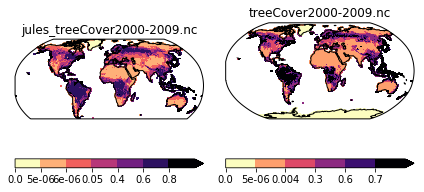

In [3]:
sim = pop_sim.collapsed('time', iris.analysis.MEAN)
m = mask.collapsed('time', iris.analysis.MEAN)

sim.long_name = file
m.long_name = file_m
plot_lonely_cube(sim, 1, 2, 1, cmap="magma_r", levels= None)
plot_lonely_cube(m, 1, 2, 2, cmap="magma_r", levels= None)

In [24]:
adj_sim = mask.copy()
adj_sim.data = pop_sim.data

In [25]:
iris.save(adj_sim, dir_out + outfile + '.nc')

Reload both and plot to make sure I haven't messed it up (these should be the same)

In [26]:
light = iris.load_cube(dir + file)
adj = iris.load_cube(dir_out + outfile + '.nc')

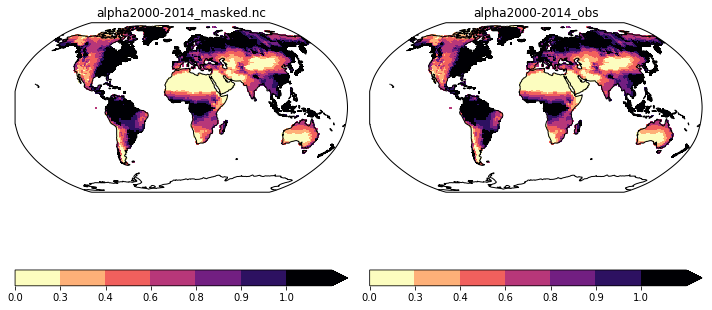

In [27]:
plt.figure(figsize = (10, 7.5))

sim = light.collapsed('time', iris.analysis.MEAN)
sim.long_name = file
obs = adj.collapsed('time', iris.analysis.MEAN)
obs.long_name = outfile

plot_lonely_cube(sim, 1, 2, 1, cmap="magma_r", levels= None)
plot_lonely_cube(obs, 1, 2, 2, cmap="magma_r", levels= None)